# Proyek Akhir : Membuat Model Sistem Rekomendasi
- **Nama:** Muhammad Dila
- **Email:** muhammaddila.all@gmail.com
- **ID Dicoding:** muhdila

# Project Overview

Membaca buku adalah aktivitas penting yang berkontribusi pada pengembangan pengetahuan, keterampilan berpikir kritis, dan kesehatan mental. Namun, di era digital saat ini, pembaca dihadapkan pada jutaan pilihan buku baik di platform online maupun offline. Akibatnya, banyak pengguna mengalami "choice overload", yaitu kesulitan memilih buku yang sesuai dengan minat mereka.

Dengan menggunakan pendekatan machine learning, kita dapat membangun sistem rekomendasi yang menyarankan buku berdasarkan interaksi pengguna terdahulu, seperti rating atau review yang pernah diberikan.

**Mengapa masalah ini penting untuk diselesaikan?**
- Minat baca global terus mengalami penurunan, terutama di kalangan muda, sebagaimana disebutkan dalam studi oleh Alharthi et al. (2018).
- Sistem rekomendasi dapat meningkatkan engagement pengguna dengan menawarkan buku-buku yang lebih relevan dengan preferensi mereka.
- Membantu penerbit dan penulis dalam meningkatkan keterjangkauan buku mereka kepada target pembaca yang tepat.

**Bagaimana cara menyelesaikannya?**
- Dengan membangun sistem rekomendasi berbasis Collaborative Filtering dan Content-based Filtering menggunakan data interaksi pengguna-buku.
- Pendekatan tambahan Content-Based Filtering juga dapat digunakan untuk memperkuat hasil rekomendasi dengan mempertimbangkan genre atau kategori buku.
- Dataset yang digunakan adalah [Book Recommendation Dataset dari Kaggle](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset).

**Referensi:**
- A Survey of Book Recommender Systems, [Alharthi et al., 2018](https://link.springer.com/article/10.1007/s10844-017-0489-9)

# Business Understanding

Pada bagian ini, kami akan menjelaskan proses klarifikasi masalah yang menjadi dasar dalam membangun sistem rekomendasi buku berbasis machine learning yang dimana mencakup:

## Problem Statements

- Pembaca kesulitan menemukan buku yang sesuai dengan preferensi pribadi mereka karena banyaknya pilihan yang tersedia, menyebabkan fenomena "choice overload".
- Terjadi penurunan minat baca secara global, terutama di kalangan generasi muda, meskipun akses terhadap literatur semakin luas.
- Platform buku online dan penerbit membutuhkan cara untuk meningkatkan keterlibatan pengguna dan memperkenalkan buku-buku baru secara lebih efektif kepada audiens yang tepat.

## Goals

- Membantu pengguna menemukan buku yang relevan dengan minat mereka melalui sistem rekomendasi berbasis data interaksi pengguna.
- Meningkatkan tingkat engagement pengguna terhadap platform buku online dengan menawarkan rekomendasi yang dipersonalisasi.
- Memberikan nilai tambah bagi penerbit dan penulis dengan memperluas jangkauan buku mereka ke target pembaca yang lebih spesifik.
- Mendukung peningkatan budaya literasi dengan membuat proses menemukan buku menjadi lebih mudah dan menarik.

## Solution Statements

- **Collaborative Filtering**
  Menggunakan pola kesamaan preferensi antar pengguna berdasarkan rating atau ulasan untuk merekomendasikan buku yang kemungkinan besar akan disukai pengguna lain.
  *Kelebihan:* Tidak memerlukan informasi eksplisit tentang buku. Efektif untuk dataset besar.
  *Kekurangan:* Menghadapi masalah cold-start pada pengguna atau buku baru.

- **Content-Based Filtering**
  Menggunakan fitur atau atribut buku (seperti genre, kategori, deskripsi) untuk merekomendasikan buku yang mirip dengan yang pernah disukai oleh pengguna.
  *Kelebihan:* Mampu memberikan rekomendasi meski data rating sedikit.
  *Kekurangan:* Rekomendasi bisa kurang variatif karena hanya berdasarkan konten serupa.

# Data Understanding

In [9]:
# Import library os
import os

# Cek apakah file kaggle.json tersedia
assert os.path.exists(os.path.expanduser('~/.kaggle/kaggle.json')), "File kaggle.json belum tersedia. Silakan cek di folder ~/.kaggle/."

# Proses download dataset menggunakan Kaggle API
os.system('kaggle datasets download -d arashnic/book-recommendation-dataset')

print("Download selesai")

Download selesai


#### Download Dataset

Pada tahap ini, sistem akan melakukan proses pengunduhan dataset secara otomatis dari Kaggle.
Dataset yang digunakan adalah [Book Recommendation Dataset - Kaggle](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset).
Pastikan file `kaggle.json` telah disiapkan di direktori `~/.kaggle/` agar proses download dapat berjalan dengan lancar.

In [10]:
# Import library zipfile
import zipfile

# Mengekstrak file ZIP ke folder BookRecommendation
with zipfile.ZipFile('book-recommendation-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('BookRecommendation')

print("Extract selesai bro!")

Extract selesai bro!


#### Extract Dataset

Setelah file dataset berhasil diunduh, tahap berikutnya adalah mengekstrak file `book-recommendation-dataset.zip`
ke dalam folder `BookRecommendation/`.
Ekstraksi ini bertujuan untuk memperoleh file CSV yang akan digunakan dalam tahap selanjutnya.

In [11]:
# Load dataset menggunakan pandas
import pandas as pd

books = pd.read_csv('BookRecommendation/Books.csv', low_memory=False)
users = pd.read_csv('BookRecommendation/Users.csv')
ratings = pd.read_csv('BookRecommendation/Ratings.csv')

print("Dataset berhasil dimuat!")

Dataset berhasil dimuat!


#### Load Dataset

Pada tahap ini, dataset yang sudah diekstrak akan dibaca ke dalam struktur DataFrame menggunakan library `pandas`.
Dataset terdiri dari tiga file utama: `Books.csv`, `Users.csv`, dan `Ratings.csv`.


In [12]:
# Menampilkan jumlah baris dan kolom dari setiap dataset
print(f"Jumlah data Books: {books.shape}")
print(f"Jumlah data Users: {users.shape}")
print(f"Jumlah data Ratings: {ratings.shape}")

Jumlah data Books: (271360, 8)
Jumlah data Users: (278858, 3)
Jumlah data Ratings: (1149780, 3)


#### Informasi Umum Dataset

Tahap ini bertujuan untuk memahami jumlah data dan kondisi awal dataset.
Kami menampilkan jumlah baris dan kolom dari setiap file dataset menggunakan fungsi `.shape`.

Berikut adalah hasil jumlah data dari masing-masing dataset:
- **Books.csv**: 271.360 baris, 8 kolom
- **Users.csv**: 278.858 baris, 3 kolom
- **Ratings.csv**: 1.149.780 baris, 3 kolom

### Data Books

In [30]:
# Menampilkan struktur data Books
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
Jumlah ISBN unik: 340556


#### Struktur Data Books

Pada tahap ini, kami menampilkan struktur data dari dataset Books menggunakan fungsi `.info()`.
Dataset Books memiliki 271.360 entri dan 8 kolom. Semua kolom bertipe data object (string).

Berikut detail jumlah non-null untuk setiap kolom:
- `ISBN`: 271.360 non-null
- `Book-Title`: 271.360 non-null
- `Book-Author`: 271.358 non-null
- `Year-Of-Publication`: 271.360 non-null
- `Publisher`: 271.358 non-null
- `Image-URL-S`: 271.360 non-null
- `Image-URL-M`: 271.360 non-null
- `Image-URL-L`: 271.357 non-null

Terdapat beberapa kolom dengan missing value, yaitu pada kolom `Book-Author`, `Publisher`, dan `Image-URL-L`.
Hal ini perlu diperhatikan pada tahap pembersihan data selanjutnya.

In [16]:
# Melihat 5 baris pertama dari dataset Books
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


#### Sampel Data Books

Pada tahap ini, kami menampilkan lima baris pertama dari dataset Books menggunakan fungsi `.head()`.
Tujuannya adalah untuk memahami struktur data dan tipe informasi yang tersedia di dalam dataset.

Contoh data dari lima buku pertama adalah sebagai berikut:
- Buku pertama berjudul **"Classical Mythology"** karya **Mark P. O. Morford**, diterbitkan pada tahun **2002** oleh **Oxford University Press**.
- Buku kedua berjudul **"Clara Callan"** karya **Richard Bruce Wright**, diterbitkan pada tahun **2001** oleh **HarperFlamingo Canada**.
- Buku ketiga berjudul **"Decision in Normandy"** karya **Carlo D'Este**, diterbitkan pada tahun **1991** oleh **HarperPerennial**.
- Buku keempat berjudul **"Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It"** karya **Gina Bari Kolata**, diterbitkan pada tahun **1999** oleh **Farrar Straus Giroux**.
- Buku kelima berjudul **"The Mummies of Urumchi"** karya **E. J. W. Barber**, diterbitkan pada tahun **1999** oleh **W. W. Norton & Company**.

Selain informasi mengenai ISBN, judul, penulis, dan penerbit, dataset ini juga menyediakan URL gambar sampul buku dalam tiga ukuran (kecil, sedang, besar).

In [17]:
# Menampilkan statistik ringkasan untuk Books
books.describe(include='all')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,118,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,17627,7535,2,2,2


#### Statistik Ringkasan Books

Pada tahap ini, kami menggunakan fungsi `.describe(include='all')` untuk melihat ringkasan statistik dari dataset Books.
Ringkasan statistik ini membantu memahami karakteristik umum data, seperti jumlah entri, nilai unik, nilai paling sering muncul (top), dan frekuensi kemunculannya (freq).

Berikut beberapa insight dari hasil statistik:
- Terdapat **271.360** data ISBN yang unik, menunjukkan setiap buku memiliki ISBN berbeda.
- Terdapat **242.135** judul buku yang unik. Ada beberapa judul yang sama muncul lebih dari sekali (contoh: **"Selected Poems"** muncul sebanyak **27 kali**).
- Penulis paling populer dalam dataset adalah **Agatha Christie**, dengan **632** buku tercatat.
- Tahun publikasi paling sering adalah **2002**, dengan **17.627** buku diterbitkan pada tahun tersebut.
- Penerbit dengan jumlah buku terbanyak adalah **Harlequin**, sebanyak **7.535** buku.
- Untuk gambar cover (`Image-URL`), sebagian besar URL unik, namun ada URL yang dipakai lebih dari sekali.

Informasi ini penting untuk memahami distribusi data dan pola-pola umum sebelum melakukan tahap data preparation lebih lanjut.

In [18]:
# Mengecek jumlah missing value pada setiap kolom di Books
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

#### Missing Value Books

Pada tahap ini, kami memeriksa jumlah missing value di setiap kolom pada dataset Books menggunakan fungsi `.isnull().sum()`.
Pemeriksaan ini penting untuk mengidentifikasi kolom-kolom yang memerlukan penanganan khusus pada tahap data preparation.

Hasil pemeriksaan menunjukkan:
- Kolom `Book-Author` memiliki **2** missing value.
- Kolom `Publisher` memiliki **2** missing value.
- Kolom `Image-URL-L` memiliki **3** missing value.
- Kolom lainnya (`ISBN`, `Book-Title`, `Year-Of-Publication`, `Image-URL-S`, `Image-URL-M`) tidak memiliki missing value.

Dengan demikian, pada tahap selanjutnya, diperlukan strategi penanganan terhadap missing value, khususnya pada kolom `Book-Author`, `Publisher`, dan `Image-URL-L`.

In [31]:
# Cek jumlah buku unik
print('Jumlah ISBN unik:', ratings['ISBN'].nunique())

Jumlah ISBN unik: 340556


#### Jumlah ISBN Unik

Pada tahap ini, kami menghitung jumlah buku unik dalam dataset Ratings menggunakan fungsi `.nunique()` pada kolom `ISBN`.

Hasilnya, terdapat sebanyak **340.556 buku unik** dalam dataset.
Jumlah ini menunjukkan keberagaman koleksi buku yang pernah dirating oleh pengguna.

In [49]:
# Cek jumlah duplikat di Books
print('Jumlah duplikat di Books:', books.duplicated().sum())

Jumlah duplikat di Books: 0


#### Cek Duplikat di Dataset Books

Pada tahap ini, kami memeriksa apakah terdapat data duplikat dalam dataset Books.
Duplikat data dapat menyebabkan bias dalam analisis sehingga penting untuk mengidentifikasinya sejak awal.

**Hasil pemeriksaan:**
Tidak ditemukan data duplikat pada dataset Books (`Jumlah duplikat = 0`).

### Data Rating

In [33]:
# Menampilkan struktur data Ratings
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB
Jumlah data rating: 1149780


#### Struktur Data Ratings

Pada tahap ini, kami menampilkan struktur data dari dataset Ratings menggunakan fungsi `.info()`.
Dataset Ratings memiliki sebanyak **1.149.780 entri** dengan **3 kolom**: `User-ID`, `ISBN`, dan `Book-Rating`.

Detail tipe data:
- `User-ID`: integer
- `ISBN`: object (string)
- `Book-Rating`: integer

Semua kolom tidak memiliki missing value berdasarkan jumlah non-null yang sama dengan jumlah total entri.

In [20]:
# Menampilkan 5 baris pertama dari dataset Ratings
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


#### Sampel Data Ratings

Pada tahap ini, kami menampilkan lima baris pertama dari dataset Ratings menggunakan fungsi `.head()`.
Tujuannya adalah untuk memahami struktur data lebih rinci.

Contoh data dari lima rating pertama adalah sebagai berikut:
- User-ID 276725 memberi rating 0 pada buku dengan ISBN `034545104X`
- User-ID 276726 memberi rating 5 pada buku dengan ISBN `0155061224`
- User-ID 276727 memberi rating 0 pada buku dengan ISBN `0446520802`
- User-ID 276729 memberi rating 3 pada buku dengan ISBN `052165615X`
- User-ID 276729 memberi rating 6 pada buku dengan ISBN `0521795028`

Hal ini menunjukkan bahwa satu user dapat memberikan rating ke lebih dari satu buku.

In [21]:
# Menampilkan statistik ringkasan untuk Ratings
ratings.describe(include='all')

,User-ID,ISBN,Book-Rating
count,1.149780e+06,1149780,1.149780e+06
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,1.403864e+05,NaN,2.866950e+00
std,8.056228e+04,NaN,3.854184e+00
min,2.000000e+00,NaN,0.000000e+00
25%,7.034500e+04,NaN,0.000000e+00
50%,1.410100e+05,NaN,0.000000e+00
75%,2.110280e+05,NaN,7.000000e+00


#### Statistik Ringkasan Ratings

Pada tahap ini, kami menggunakan fungsi `.describe(include='all')` untuk melihat ringkasan statistik dataset Ratings.

Beberapa insight penting:
- Rata-rata nilai rating adalah **2.87**, dengan standar deviasi sebesar **3.85**.
- Rating minimum adalah **0** dan maksimum **10**.
- Sebanyak 50% data memiliki rating **0**, yang menunjukkan banyak user melakukan rating kosong (default).
- ISBN paling sering muncul adalah `0971880107`, sebanyak **2.502 kali**.
- Terdapat **340.556 ISBN unik** di dalam dataset.

Data ini menunjukkan adanya sparsity pada interaksi user-buku, yang merupakan karakteristik umum pada sistem rekomendasi.

In [22]:
# Mengecek jumlah missing value di setiap kolom di Ratings
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

#### Missing Value Ratings

Pada tahap ini, kami memeriksa jumlah missing value di setiap kolom menggunakan fungsi `.isnull().sum()`.
Hasilnya:

- `User-ID`: 0 missing value
- `ISBN`: 0 missing value
- `Book-Rating`: 0 missing value

Dengan demikian, dataset Ratings **tidak memiliki missing value** dan dapat langsung digunakan dalam proses selanjutnya tanpa perlu tahap pembersihan untuk missing value.

In [48]:
# Cek jumlah duplikat di Ratings
print('Jumlah duplikat di Ratings:', ratings.duplicated().sum())

Jumlah duplikat di Ratings: 0


#### Cek Duplikat di Dataset Ratings

Akhirnya, kami memeriksa data duplikat pada dataset Ratings.
Karena Ratings merupakan data interaksi user-buku, duplikasi bisa mengganggu keakuratan model rekomendasi.

**Hasil pemeriksaan:**
Tidak ditemukan data duplikat pada dataset Ratings (`Jumlah duplikat = 0`).


### Data User

In [34]:
# Menampilkan struktur data Users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
Jumlah User-ID unik: 105283


#### Struktur Data Users

Pada tahap ini, kami menampilkan struktur data dari dataset Users menggunakan fungsi `.info()`.
Dataset Users memiliki sebanyak **278.858 entri** dengan **3 kolom**, yaitu: `User-ID`, `Location`, dan `Age`.

Detail tipe data:
- `User-ID`: integer
- `Location`: object (string)
- `Age`: float64

Terdapat missing value pada kolom `Age`, karena jumlah non-null lebih sedikit dibanding total entri.

In [24]:
# Menampilkan 5 baris pertama dari dataset Users
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


#### Sampel Data Users

Pada tahap ini, kami menampilkan lima baris pertama dari dataset Users menggunakan fungsi `.head()`.
Tujuannya adalah untuk memahami bentuk dan isi data pengguna.

Contoh data dari lima pengguna pertama:
- User-ID 1 berasal dari lokasi **"nyc, new york, usa"** dengan usia tidak tersedia (NaN).
- User-ID 2 berasal dari lokasi **"stockton, california, usa"** dengan usia **18 tahun**.
- User-ID 3 berasal dari lokasi **"moscow, yukon territory, russia"** dengan usia tidak tersedia (NaN).
- User-ID 4 berasal dari lokasi **"porto, v.n.gaia, portugal"** dengan usia **17 tahun**.
- User-ID 5 berasal dari lokasi **"farnborough, hants, united kingdom"** dengan usia tidak tersedia (NaN).

Terlihat bahwa kolom `Location` berisi informasi negara/kota pengguna, dan sebagian besar nilai `Age` kosong.

In [25]:
# Menampilkan statistik ringkasan untuk Users
users.describe(include='all')

,User-ID,Location,Age
count,278858.00000,278858,168096.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,34.751434
std,80499.51502,NaN,14.428097
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,24.000000
50%,139429.50000,NaN,32.000000
75%,209143.75000,NaN,44.000000


#### Statistik Ringkasan Users

Pada tahap ini, kami menggunakan fungsi `.describe(include='all')` untuk melihat ringkasan statistik dari dataset Users.

Beberapa insight penting:
- Rata-rata usia pengguna adalah **34.75 tahun**.
- Usia minimum adalah **0 tahun**, dan maksimum tercatat **244 tahun**, yang kemungkinan merupakan data tidak valid.
- Lokasi paling sering muncul adalah **"london, england, united kingdom"**, dengan sebanyak **2.506 pengguna** berasal dari lokasi tersebut.
- Terdapat **57.339 lokasi unik** dalam dataset.

Data ini mengindikasikan adanya kebutuhan untuk membersihkan nilai anomali pada kolom `Age` dalam tahap data preparation.

In [26]:
# Mengecek jumlah missing value di setiap kolom di Users
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

#### Missing Value Users

Pada tahap ini, kami memeriksa jumlah missing value di setiap kolom dataset Users menggunakan fungsi `.isnull().sum()`.

Hasil pemeriksaan:
- `User-ID`: 0 missing value
- `Location`: 0 missing value
- `Age`: **110.762 missing value**

Dengan demikian, sekitar 40% data pada kolom `Age` hilang, sehingga diperlukan strategi khusus untuk menangani missing value ini, seperti imputasi atau penghapusan data.

In [35]:
# Cek jumlah user unik
print('Jumlah User-ID unik:', ratings['User-ID'].nunique())

Jumlah User-ID unik: 105283


#### Jumlah User-ID Unik

Pada tahap ini, kami menghitung jumlah user unik dalam dataset Ratings menggunakan fungsi `.nunique()` pada kolom `User-ID`.

Hasilnya, terdapat sebanyak **105.283 user unik** dalam dataset.
Jumlah ini mencerminkan banyaknya individu berbeda yang memberikan rating terhadap buku.

In [47]:
# Cek duplikat di Users
print('Duplikat di Users:', users.duplicated().sum())

Duplikat di Users: 0


#### Cek Duplikat di Dataset Users

Selanjutnya, kami memeriksa keberadaan data duplikat dalam dataset Users.
Memastikan tidak adanya duplikat penting untuk menjaga keakuratan dalam analisis pengguna.

**Hasil pemeriksaan:**
Tidak ditemukan data duplikat pada dataset Users (`Jumlah duplikat = 0`).

### Exploratory Data Analysis (EDA)

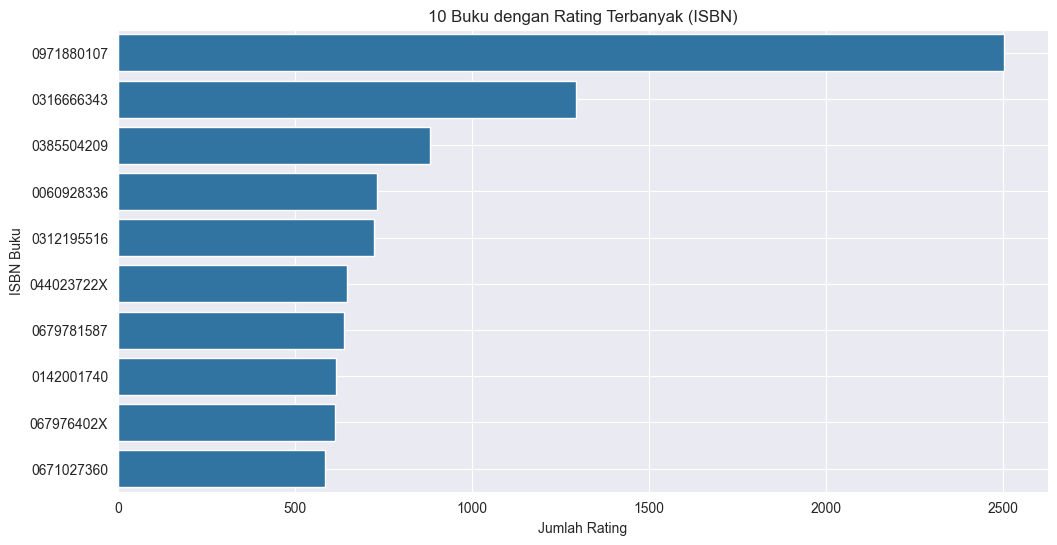

In [41]:
# Import library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah rating per ISBN
top_books = ratings['ISBN'].value_counts().head(10)

# Visualisasi 10 ISBN dengan rating terbanyak
plt.figure(figsize=(12,6))
sns.barplot(x=top_books.values, y=top_books.index)
plt.title('10 Buku dengan Rating Terbanyak (ISBN)')
plt.xlabel('Jumlah Rating')
plt.ylabel('ISBN Buku')
plt.grid(True)
plt.show()

#### Insight 10 Buku dengan Rating Terbanyak

Berdasarkan hasil analisis, ISBN `0971880107` menjadi buku dengan jumlah rating terbanyak, melebihi **2500 rating**.
Diikuti oleh ISBN `0316666343` dan `0385504209` dengan jumlah rating yang juga cukup tinggi.

Hal ini menunjukkan bahwa ada beberapa buku populer yang menjadi favorit pengguna untuk diberi rating, yang bisa menjadi kandidat kuat untuk baseline rekomendasi atau analisis popularitas lebih lanjut.

Perlu diperhatikan bahwa ISBN digunakan dalam dataset ini tanpa detail metadata buku (judul, penulis), sehingga pada tahap implementasi lebih lanjut, mapping ke informasi tambahan mungkin diperlukan.

In [44]:
# Ambil 10 ISBN yang paling banyak dirating
top_books = ratings['ISBN'].value_counts().head(10).reset_index()

# Rename kolom supaya mudah di-merge
top_books.columns = ['ISBN', 'Jumlah Rating']

# Join ke dataset books untuk dapatkan judul buku
top_books_titles = top_books.merge(books[['ISBN', 'Book-Title']], on='ISBN', how='left')

# Tampilkan hasil
top_books_titles[['ISBN', 'Book-Title', 'Jumlah Rating']]

,ISBN,Book-Title,Jumlah Rating
0,0971880107,Wild Animus,2502
1,0316666343,The Lovely Bones: A Novel,1295
2,0385504209,The Da Vinci Code,883
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,732
4,0312195516,The Red Tent (Bestselling Backlist),723
5,044023722X,A Painted House,647
6,0679781587,NaN,639
7,0142001740,The Secret Life of Bees,615
8,067976402X,Snow Falling on Cedars,614
9,0671027360,Angels &amp; Demons,586


#### Mapping ISBN ke Judul Buku - 10 Buku dengan Rating Terbanyak

Pada tahap ini, kami memetakan 10 ISBN yang paling banyak menerima rating ke dalam judul buku yang bersangkutan.
Tujuannya adalah untuk membuat hasil analisis lebih informatif dan mudah dipahami dibandingkan hanya menggunakan kode ISBN saja.

Berikut adalah 10 buku dengan jumlah rating terbanyak:

| Judul Buku | Jumlah Rating |
|:-----------|:--------------|
| Wild Animus | 2502 |
| The Lovely Bones: A Novel | 1295 |
| The Da Vinci Code | 883 |
| Divine Secrets of the Ya-Ya Sisterhood: A Novel | 732 |
| The Red Tent (Bestselling Backlist) | 723 |
| A Painted House | 647 |
| NaN | 639 |
| The Secret Life of Bees | 615 |
| Snow Falling on Cedars | 614 |
| Angels & Demons | 586 |

**Catatan:**
- Terdapat satu ISBN (`0679781587`) yang tidak memiliki informasi `Book-Title` (bernilai `NaN`), sehingga perlu perhatian khusus jika data ini digunakan dalam tahap modeling atau visualisasi berikutnya.

Dengan hasil ini, analisis popularitas buku dapat lebih mudah dipahami, dan sistem rekomendasi nantinya bisa memberikan rekomendasi berbasis judul buku, bukan hanya berdasarkan ISBN.

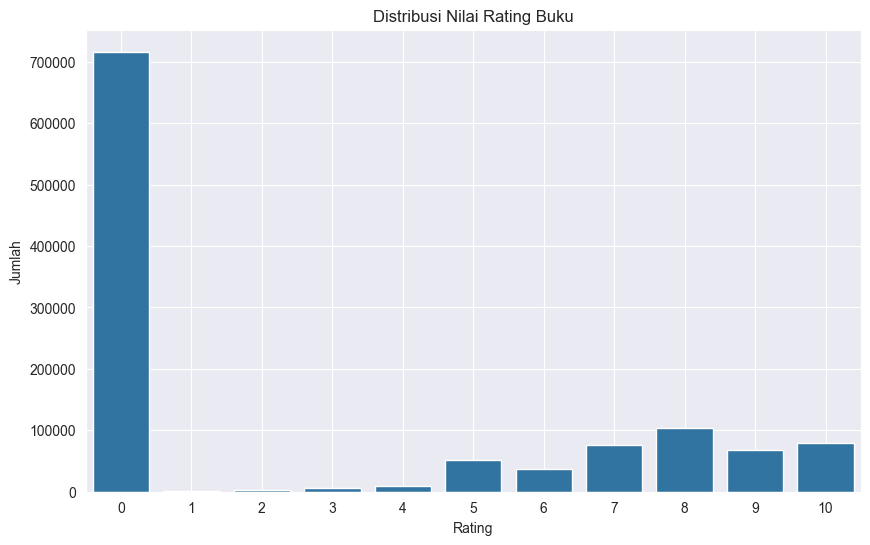

In [42]:
# Visualisasi distribusi rating
plt.figure(figsize=(10,6))
sns.countplot(x='Book-Rating', data=ratings)  # Hapus palette
plt.title('Distribusi Nilai Rating Buku')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.grid(True)
plt.show()

#### Insight Distribusi Nilai Rating Buku

Visualisasi distribusi nilai rating menunjukkan bahwa sebagian besar pengguna memberikan rating **0** terhadap buku.
Rating **0** mendominasi dengan jumlah yang sangat besar dibandingkan rating lainnya.

Sementara itu, rating tinggi seperti **8**, **9**, dan **10** juga cukup banyak diberikan, menunjukkan adanya bias positif dari pengguna yang aktif memberi rating lebih baik terhadap buku yang mereka sukai.

Distribusi ini memperlihatkan adanya ketimpangan yang signifikan antara rating kosong (0) dan rating valid (1-10), yang perlu dipertimbangkan pada tahap modeling rekomendasi.

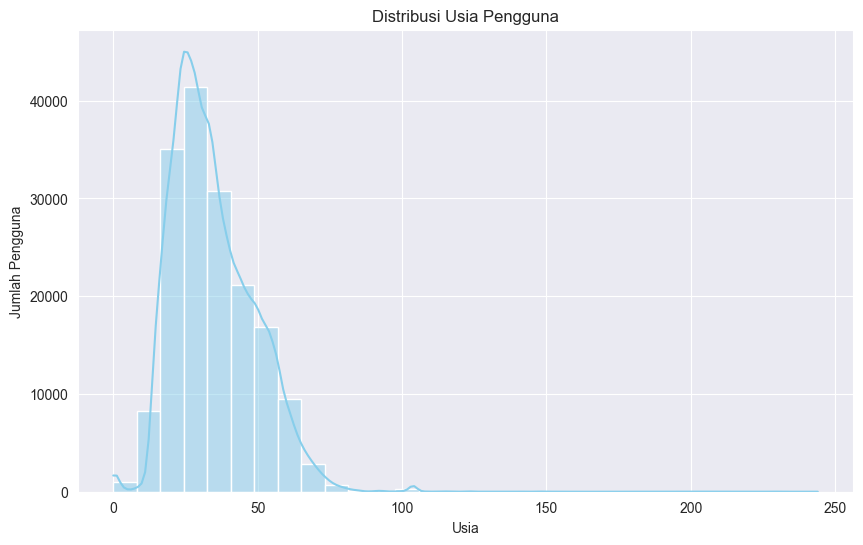

In [39]:
# Visualisasi distribusi usia pengguna
plt.figure(figsize=(10,6))
sns.histplot(users['Age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribusi Usia Pengguna')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pengguna')
plt.grid(True)
plt.show()

#### Insight Distribusi Usia Pengguna

Dari hasil visualisasi distribusi usia pengguna, terlihat bahwa mayoritas pengguna berada pada rentang usia **20 hingga 50 tahun**, dengan puncak distribusi sekitar usia **30 tahun**.

Terdapat beberapa nilai anomali di atas **100 tahun** bahkan mendekati **244 tahun**, yang kemungkinan merupakan kesalahan input data.
Hal ini perlu diperhatikan pada tahap pembersihan data selanjutnya untuk menghindari bias dalam analisis lebih lanjut.

### Analisis Data Understanding

## Data Understanding

Pada bagian ini, kami menjelaskan jumlah data, kondisi data, dan informasi mengenai dataset yang digunakan. Dataset yang digunakan dalam proyek ini adalah [Book Recommendation Dataset - Kaggle](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset).

Dataset ini terdiri dari tiga file utama:
- `Books.csv` : berisi informasi mengenai buku, seperti ISBN, judul, penulis, tahun terbit, penerbit, dan gambar sampul.
- `Users.csv` : berisi informasi mengenai pengguna, seperti User-ID, lokasi, dan usia.
- `Ratings.csv` : berisi data interaksi antara pengguna dan buku, berupa rating yang diberikan.

### Informasi Jumlah Data

- Books.csv: 271.360 entri, 8 kolom
- Users.csv: 278.858 entri, 3 kolom
- Ratings.csv: 1.149.780 entri, 3 kolom

### Informasi Kondisi Data

- Dataset Books:
  - Memiliki beberapa missing value di kolom `Book-Author`, `Publisher`, dan `Image-URL-L`.
- Dataset Users:
  - Terdapat sekitar 110.762 missing value pada kolom `Age`.
  - Ditemukan usia tidak valid, seperti 0 dan lebih dari 100 tahun.
- Dataset Ratings:
  - Tidak terdapat missing value.
  - Banyak pengguna memberikan rating 0.

### Uraian Variabel

**Books.csv**
- `ISBN` : ID unik buku
- `Book-Title` : Judul buku
- `Book-Author` : Nama penulis buku
- `Year-Of-Publication` : Tahun penerbitan buku
- `Publisher` : Nama penerbit
- `Image-URL-S`, `Image-URL-M`, `Image-URL-L` : URL gambar sampul (ukuran kecil, sedang, besar)

**Users.csv**
- `User-ID` : ID unik pengguna
- `Location` : Lokasi pengguna (Kota, Provinsi, Negara)
- `Age` : Usia pengguna

**Ratings.csv**
- `User-ID` : ID pengguna
- `ISBN` : ISBN buku yang diberi rating
- `Book-Rating` : Nilai rating (0–10)

### Cek Duplikat Data

Pada tahap ini, kami memeriksa apakah terdapat data duplikat pada masing-masing dataset.

Hasil pemeriksaan:
- Dataset Books: 0 duplikat
- Dataset Users: 0 duplikat
- Dataset Ratings: 0 duplikat

Tidak ditemukan data duplikat, sehingga tidak diperlukan tindakan pembersihan untuk duplikasi.

### Exploratory Data Analysis (EDA)

#### Distribusi Usia Pengguna

Visualisasi menunjukkan mayoritas pengguna berusia antara 20 hingga 50 tahun. Terdapat anomali pada usia 0 dan di atas 100 tahun, yang mengindikasikan adanya outlier.

![Distribusi Usia Pengguna](image/Distribusi%20Usia%20Pengguna.png)

**Insight**:
Mayoritas pengguna berada di rentang usia 30-40 tahun. Outlier usia di atas 100 tahun perlu dibersihkan pada tahap data preparation.

#### Distribusi Nilai Rating

Distribusi nilai rating menunjukkan bahwa sebagian besar rating yang diberikan adalah 0.
Rating tinggi seperti 8–10 juga cukup banyak, menunjukkan adanya bias positif pengguna terhadap buku favorit mereka.

![Distribusi Nilai Rating Buku](image/Distribusi%20Nilai%20Rating%20Buku.png)

**Insight**:
Proporsi rating 0 sangat dominan, menunjukkan banyak rating kosong atau default. Ini akan berpengaruh dalam tahap modeling sistem rekomendasi.

#### 10 Buku dengan Rating Terbanyak

Berikut 10 buku dengan jumlah rating terbanyak di dataset:

- Wild Animus (2502 rating)
- The Lovely Bones: A Novel (1295 rating)
- The Da Vinci Code (883 rating)
- Divine Secrets of the Ya-Ya Sisterhood: A Novel (732 rating)
- The Red Tent (723 rating)
- A Painted House (647 rating)
- [NaN] (639 rating) — Tidak diketahui judul buku
- The Secret Life of Bees (615 rating)
- Snow Falling on Cedars (614 rating)
- Angels & Demons (586 rating)

![10 Buku dengan Rating Terbanyak](image/Buku%20dengan%20Rating%20Terbanyak.png)

**Insight**:
Buku Wild Animus jauh lebih sering dirating dibandingkan buku lain, kemungkinan besar karena faktor popularitas atau faktor marketing tertentu.

**Catatan**: Terdapat ISBN yang tidak memiliki `Book-Title` (NaN), perlu perhatian lebih dalam tahap berikutnya.